#  Gom cụm bộ dữ liệu mẫu Glass bằng thuật toán KMeans

## *Mục lục:*

####  1) Chuẩn bị vấn đề:   
   - Đọc và tìm hiểu dataset(bộ dữ liệu)
   - Khai báo các thư viện cần thiết
   - Tải dataset 
#### 2) Tóm tắt dữ liệu:
   - Thống kê mô tả
   - Phân tích dữ liệu
#### 3) Chuẩn bị dữ liệu:
   - Làm sạch dữ liệu
   - Chia tách dữ liệu
   - Chuyển đổi dữ liệu
#### 4) Phân cụm:
   - Kiểm tra xu hướng cụm
   - Tìm giá trị K
   - Chạy thuật toán
   - Cấu hình cụm




## 1. Chuẩn bị vấn đề:
### Mô tả dữ liệu

- Dữ liệu gồm 214 mẫu gồm các thuộc tính của các loại kính
- Nội dung các mẫu:
    - RI : Chỉ số khúc xạ
    - Na : Natri
    - Mg : Magie
    - Si : Silicon
    - K  : Kali
    - Ca : Canxi
    - Ba : Bari
    - Fe : Sắt
 - Loại của kính (Outcome):
    - 1  : Dùng làm cửa sổ các toà nhà loại kính nổi
    - 2  : Dùng làm cửa sổ các toà nhà
    - 3  : Dùng làm cửa sổ xe loại kính nổi
    - 4  : Dùng làm cửa sổ xe  
    - 5  : Container 
    - 6  : Dùng làm mặt bàn
    - 7  : Dùng làm bóng đèn
    
 - Thiếu giá trị thuộc tính: Không



### Khai báo thư viện



In [1]:
import numpy as np
import random, os
from IPython import display

import matplotlib.pyplot as plt    
import seaborn as sns               # vẽ hình
from collections import Counter

import pandas as pd
from sklearn.datasets import make_blobs  # tạo tập điểm phân bố Gaussian
from sklearn.cluster import KMeans       # thuật toán phân cụm k-means

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings("ignore")

# cố định random-state để phục hồi lại kết quả thí nghiệm
random_state = 42
random.seed(random_state)
os.environ['PYTHONHASHSEED'] = str(random_state)
np.random.seed(random_state)

### Đọc và tìm hiểu dữ liệu


In [2]:
names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type']
features = names[0:-1]
df = pd.read_csv('dataset/glass.data',names =names)
display.display(df.head())
display.display(df.tail())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [3]:
display.display(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

## 2. Tóm tắt dữ liệu: 
### Thống kê mô tả:

Bảng thông kê phân bổ của các biến số:


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Nhận xét: Các thông số của các thuộc tính không nằm trên cùng hệ quy chiếu (scale) 

In [5]:
print("Tần số xuất hiện của tập kết quả:")
df["Type"].value_counts(sort = False)


Tần số xuất hiện của tập kết quả:


1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

Nhận xét: Tập dữ liệu kết quả không đồng đều. Loại 1 và 2 chiếm phần lớn của tập kết quả.

### Phân tích giữ liệu:
- Kiểm tra dữ liệu bị mất

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

- Kiểm tra dữ liệu NaN:

In [7]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

- Kiểm tra dữ liệu trùng lặp 

In [8]:
n_duplicated = df.duplicated()
print(f'Số dòng trùng ban đầu: {n_duplicated.sum()}')
df = df.drop_duplicates()
print(f'Bộ dữ liệu sau khi xoá: {df.shape}')

Số dòng trùng ban đầu: 1
Bộ dữ liệu sau khi xoá: (213, 10)


### Mối tương quan giữa các tính chất

In [9]:
correlations = df.iloc[:, :-1].corr(method='pearson')
display.display(correlations)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000



### Hiển thị dữ liệu

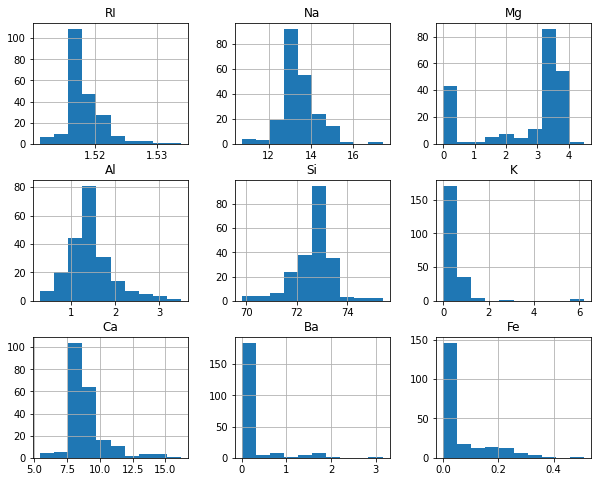

In [10]:
df[features].hist(figsize=(10, 8));

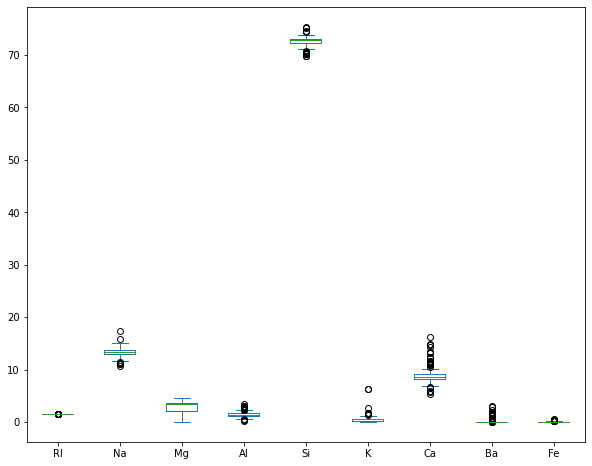

In [11]:
df[features].plot(kind="box", figsize=(10,8));

### Hiển thị nhiều tính chất

<Figure size 576x576 with 0 Axes>

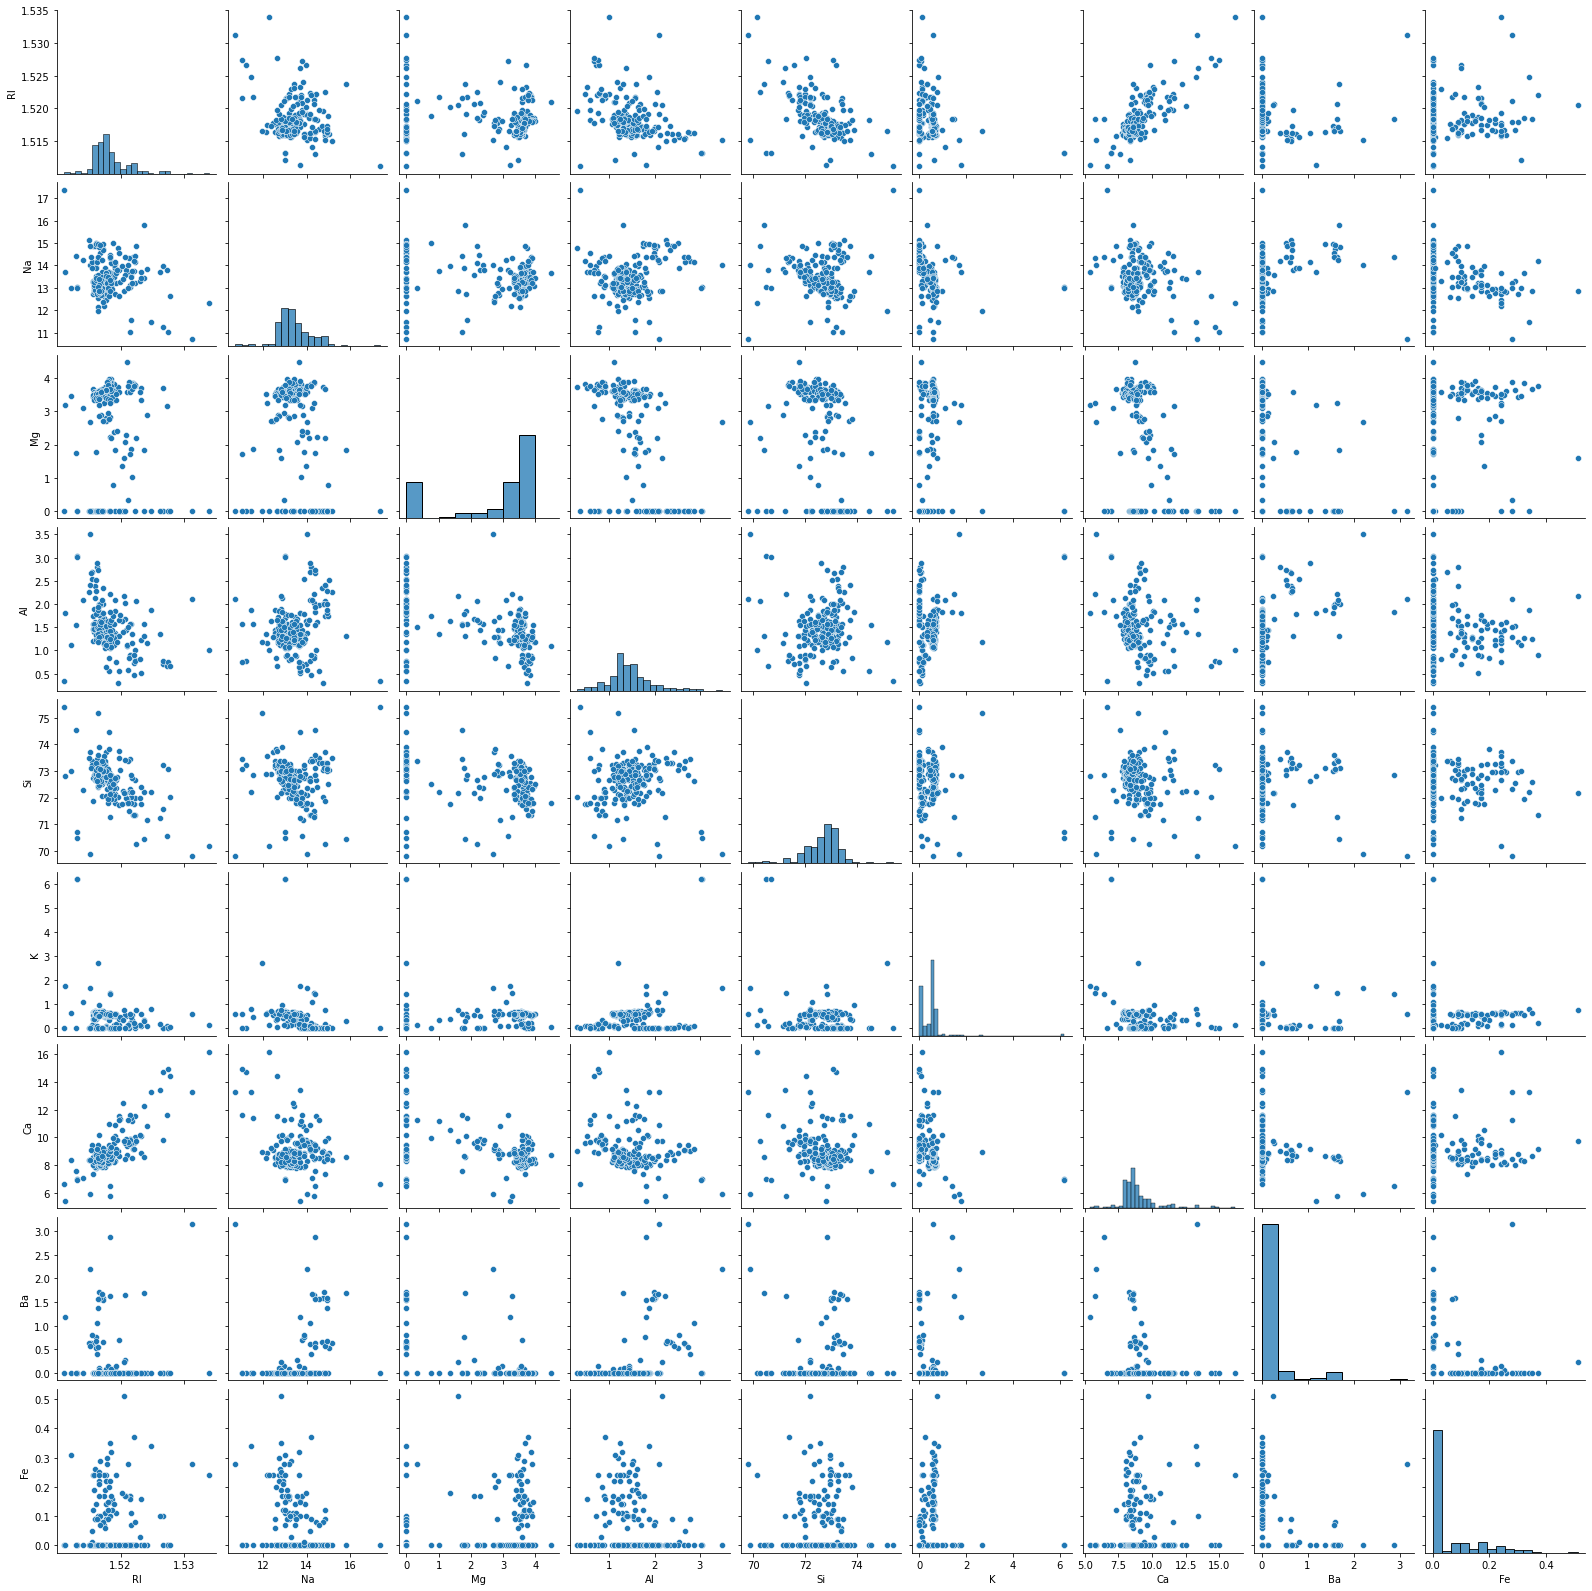

In [12]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

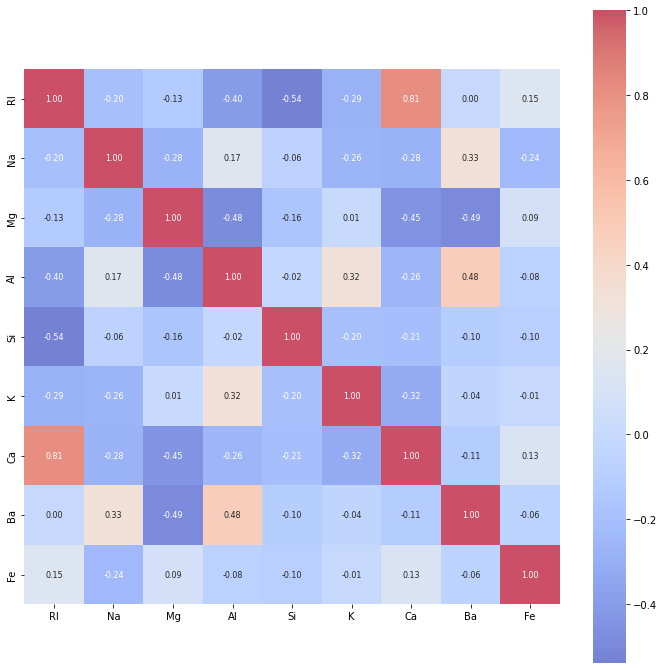

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

Nhận xét: Cặp RI - Ca có độ tương đồng cao: 0,811

### Chuẩn bị dữ liệu 
Nhận xét: Dữ liệu đã được làm sạch và số hoá

#### Tìm và loại bỏ các biến ngoại lai

In [14]:
def find_outline(df):
    outlines = []
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
         # append the found outlier indices for col to the list of outlier indices 
        outlines.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlines = Counter(outlines)        
    multiple_outliers = list( k for k, v in outlines.items() if v > 1 )
    
    return multiple_outliers

In [15]:
outlines = find_outline(df)
print(f'Số outline= {len(outlines)}')

Số outline= 49


In [16]:
#Drop outlines
df_non_outline = df.drop(outlines).reset_index(drop=True)
print(df_non_outline.shape)
print(df_non_outline.head())

(164, 10)
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


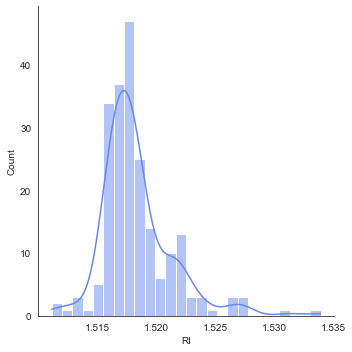

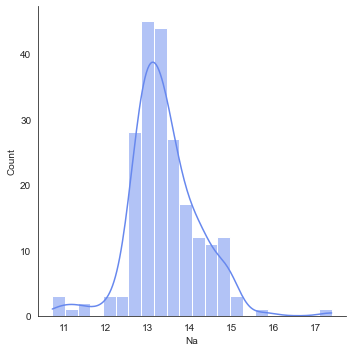

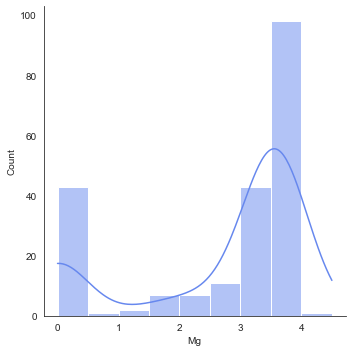

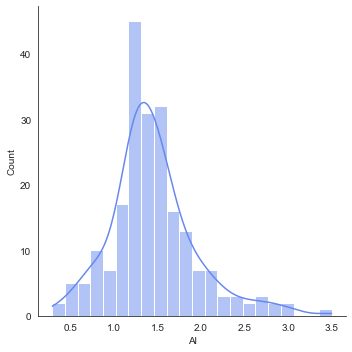

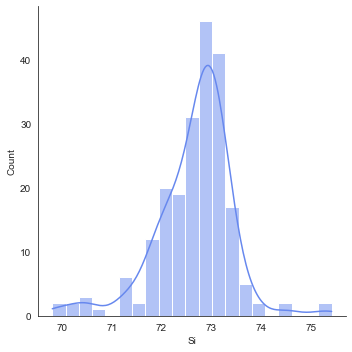

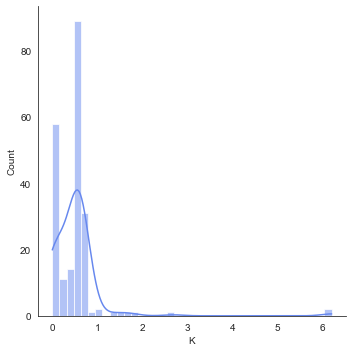

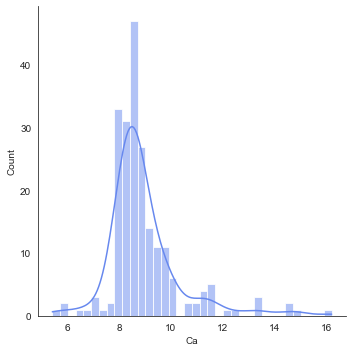

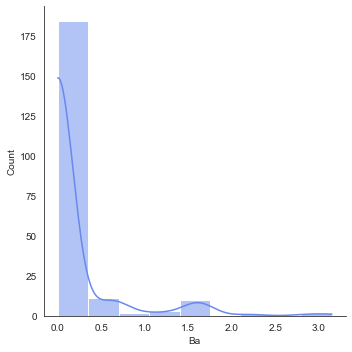

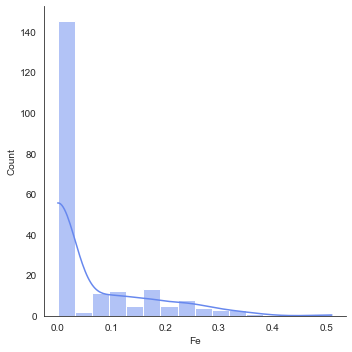

In [17]:
sns.set_style("white")
sns.set_palette("coolwarm")
for feat in features:
    sns.displot(df[feat],kde=True)

In [18]:
print(f'Tần số xuất hiện của tập kế quả sau khi loại bỏ outlier: \n{df["Type"].value_counts(sort = False)}')

Tần số xuất hiện của tập kế quả sau khi loại bỏ outlier: 
1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64


#### Chuẩn hoá dữ liệu
- Min-Max normalization

In [19]:
# Min-Max Normalization
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df[features])
df_clean_minmax = df.copy()
df_clean_minmax[features] = minmax_scaler.transform(df[features])
df_clean_minmax

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1
2,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1
3,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1
4,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1
5,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,7
211,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,7
212,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,7
213,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,7


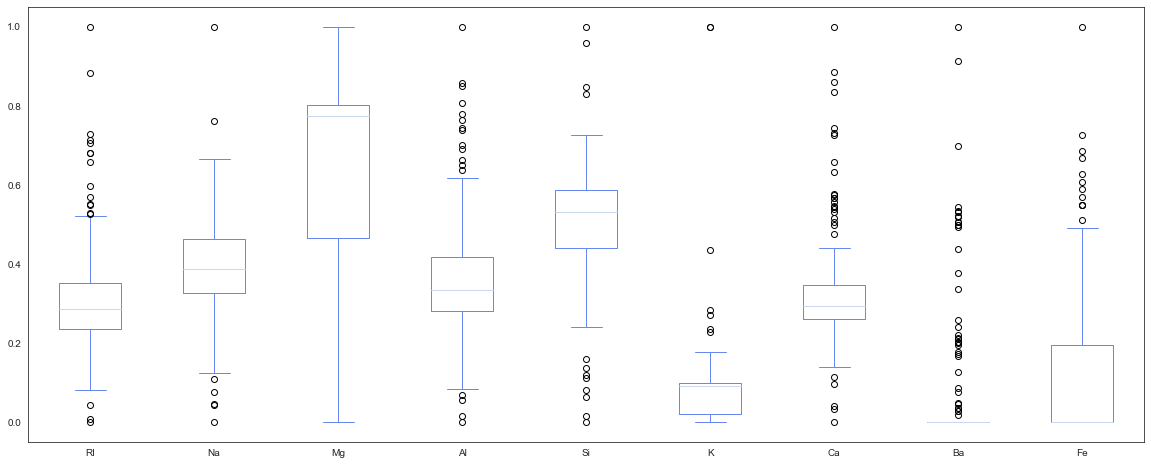

In [20]:
df_clean_minmax[features].plot(kind="box", figsize=(20,8));

- Standard Normalization 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,1
2,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,1
3,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,1
4,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,1
5,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
210,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,7
211,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,7
212,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,7
213,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,7


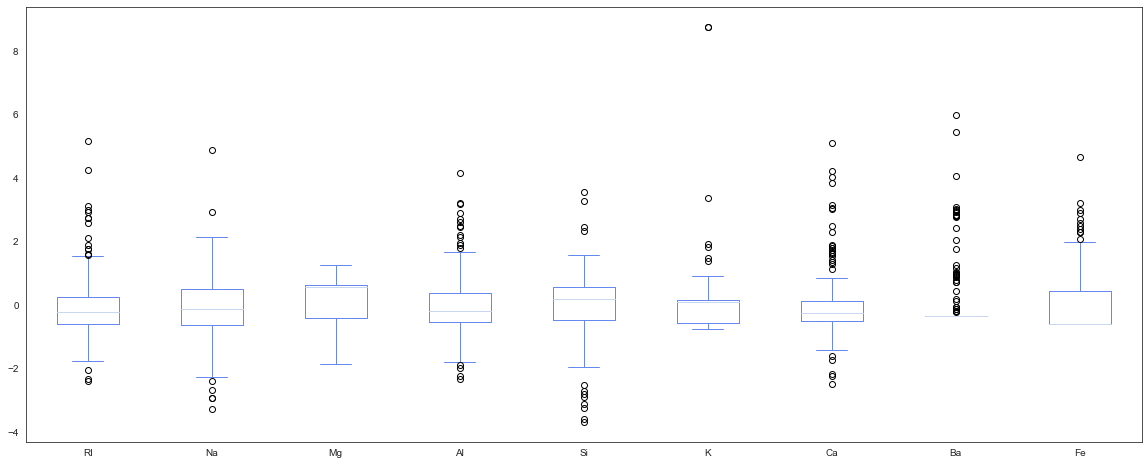

In [21]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df[features])
df_clean_standard = df.copy()
df_clean_standard[features] = standard_scaler.transform(df[features])

display.display(df_clean_standard)
df_clean_standard[features].plot(kind="box", figsize=(20,8))
plt.show()

Nhận xét: Mg, K, Ba, Fe có sự phân bố gía trị không đồng đều


In [26]:
# Standard Normalization Non Outline
standard_scaler = StandardScaler()
standard_scaler.fit(df_non_outline[features])
df_clean_standard_nonoutline = df_non_outline.copy()
df_clean_standard_nonoutline[features] = standard_scaler.transform(df_non_outline[features])

display.display(df_clean_standard_nonoutline)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.489465,0.673129,1.420505,-0.749578,-1.699126,-1.884166,-0.019079,-0.169956,-0.631743,1
1,-0.254165,1.136654,0.388310,0.102515,0.098293,0.011282,-1.089196,-0.169956,-0.631743,1
2,-0.987515,0.469178,0.330322,0.692425,0.590218,-0.394885,-1.147354,-0.169956,-0.631743,1
3,-0.228523,-0.124134,0.492690,-0.126895,-0.128750,0.417450,-0.635559,-0.169956,-0.631743,1
4,-0.351603,-0.012888,0.411506,-0.290759,0.760500,0.327190,-0.810035,-0.169956,-0.631743,1
...,...,...,...,...,...,...,...,...,...,...
159,0.212513,1.507474,-1.246964,1.085698,-0.015228,-2.154944,0.643928,-0.169956,-0.631743,6
160,-2.623451,2.082245,-1.768860,0.692425,3.541770,-2.154944,-1.368357,-0.169956,-0.631743,6
161,0.397132,3.176164,-2.882238,1.347881,-0.336872,-2.154944,1.376726,-0.169956,-0.631743,6
162,0.540726,1.618720,-3.786858,2.494928,0.117213,-2.154944,2.458475,-0.169956,-0.631743,6
